# Telco Customer Churn Dataset

The dataset can be found [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and includes information about:

1. Customers who left within the last month – the column is called Churn.
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
4. Demographic info about customers – gender, age range, and if they have partners and dependents.

Import the primary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.options.display.max_columns = None
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Telco Dataset/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns = map(str.capitalize, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customerid        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Seniorcitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   Phoneservice      7043 non-null   object 
 7   Multiplelines     7043 non-null   object 
 8   Internetservice   7043 non-null   object 
 9   Onlinesecurity    7043 non-null   object 
 10  Onlinebackup      7043 non-null   object 
 11  Deviceprotection  7043 non-null   object 
 12  Techsupport       7043 non-null   object 
 13  Streamingtv       7043 non-null   object 
 14  Streamingmovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperlessbilling  7043 non-null   object 


In [5]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

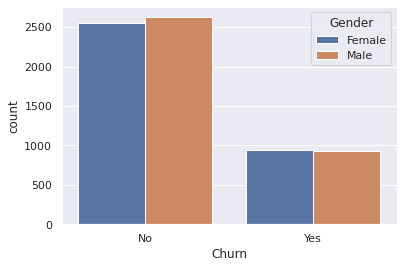

In [6]:
sns.countplot(x = 'Churn',  data = data, hue = 'Gender')

This is an unbalanced Dataset. We will analyze the performance on different algorithms before and after balancing the dataset.

## Preprocessing

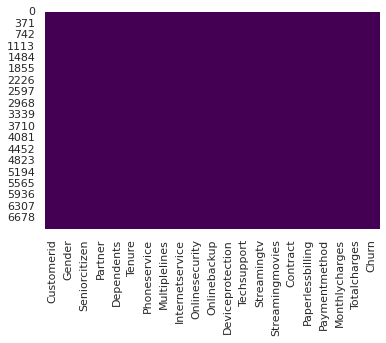

In [7]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

Are there really no null values?

In [8]:
data.isnull().sum()

Customerid          0
Gender              0
Seniorcitizen       0
Partner             0
Dependents          0
Tenure              0
Phoneservice        0
Multiplelines       0
Internetservice     0
Onlinesecurity      0
Onlinebackup        0
Deviceprotection    0
Techsupport         0
Streamingtv         0
Streamingmovies     0
Contract            0
Paperlessbilling    0
Paymentmethod       0
Monthlycharges      0
Totalcharges        0
Churn               0
dtype: int64

There are no null values. We do not need the CustomerID column, so we drop it:

In [9]:
data.drop('Customerid', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   Seniorcitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   Phoneservice      7043 non-null   object 
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   object 
 16  Paymentmethod     7043 non-null   object 


## Handling Numerical Variables

In [10]:
data['Seniorcitizen'] =  data['Seniorcitizen'].astype(str)
data['Tenure'] =  data['Tenure'].astype(str)
data['Totalcharges'] =  data['Totalcharges'].astype(str)

In [11]:
data['Seniorcitizen'] =  data['Seniorcitizen'].astype(float)
data['Tenure'] =  data['Tenure'].astype(float)
data['Totalcharges'] =  data['Totalcharges'].str.replace('', '0')
data['Totalcharges'] =  data['Totalcharges'].str.replace('0 0', '0')
data['Totalcharges'] =  data['Totalcharges'].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   Seniorcitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   float64
 5   Phoneservice      7043 non-null   object 
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   object 
 16  Paymentmethod     7043 non-null   object 


We have now changed the datatype of the three numerical columns from objects to floats. However, we have values as zero that we replaced earlier. We will need to change them into NaN and then fill them with some sort of logical calculations.

In [13]:
print('Seniorcitizen uniques: ', data['Seniorcitizen'].unique())
print('Tenure uniques: ', data['Tenure'].unique())
print('Monthlycharges uniques: ', data['Monthlycharges'].unique())
print('Totalcharges uniques: ', data['Totalcharges'].unique())

Seniorcitizen uniques:  [0. 1.]
Tenure uniques:  [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
Monthlycharges uniques:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Totalcharges uniques:  [2.09008050e+03 1.08080901e+07 1.00080011e+05 ... 3.04060041e+05
 3.00060060e+05 6.08040400e+07]


Check if there are 0's in each of these columns:

In [14]:
data['Tenure'].loc[data['Tenure'] == 0].count()

11

There are 11 zero values in the Tenure column, we will fill them with the mode since it explains the number of years a person has been part of the telecom network:

In [15]:
data['Tenure'] = data['Tenure'].replace(0, np.nan)
data['Tenure'].fillna(data['Tenure'].mode()[0], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   Seniorcitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   float64
 5   Phoneservice      7043 non-null   object 
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   object 
 16  Paymentmethod     7043 non-null   object 


In [16]:
data['Monthlycharges'].loc[data['Monthlycharges'] == 0].count()

0

There are no zero values here. We move on.

In [17]:
data['Totalcharges'].loc[data['Totalcharges'] == 0].count()

11

Totalcharges has values that are continuous. Thus, it is better to change the null values to its respective mean:

In [18]:
data['Totalcharges'] = data['Totalcharges'].replace(0, np.nan)
data['Totalcharges'].fillna(data['Totalcharges'].mean(), inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   Seniorcitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   float64
 5   Phoneservice      7043 non-null   object 
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   object 
 16  Paymentmethod     7043 non-null   object 


## Exploratory Data Analysis

Let us see if there exists a correlation between any of the numerical attributes:

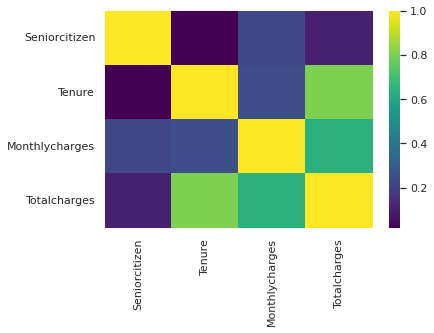

In [19]:
sns.heatmap(data.corr(), cmap = 'viridis')

There exists some correlation between Tenure and Totalcharges that may be worth exploring.

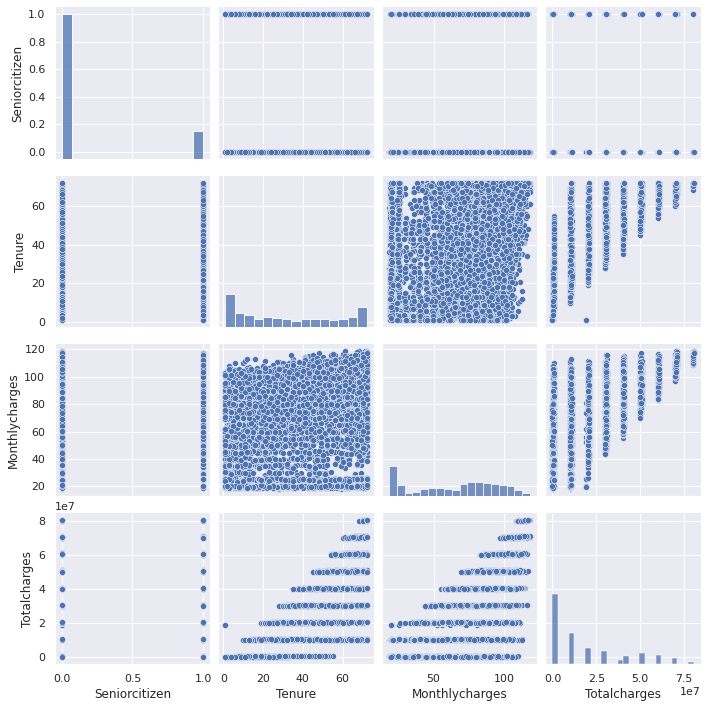

In [20]:
sns.pairplot(data = data)

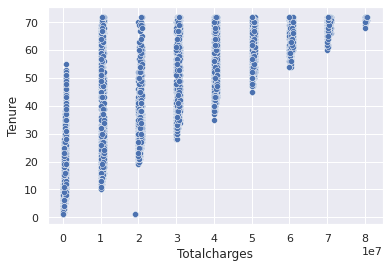

In [21]:
sns.scatterplot(y = 'Tenure', x = 'Totalcharges', data = data)

We see that at high Total charges, the tenure is high. This may correspond to the loyal customers who have spent a long time with the company and do not mind spending a large amount.

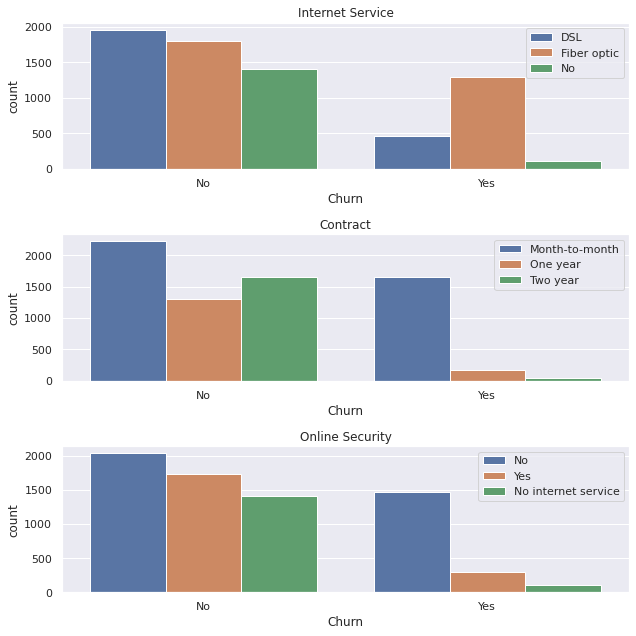

In [22]:
plt.figure(figsize=(9, 9))
plt.subplot(311)
sns.countplot(x = 'Churn', data  = data, hue = 'Internetservice')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Internet Service')
plt.tight_layout()
plt.subplot(312)
sns.countplot(x = 'Churn', data  = data, hue = 'Contract')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Contract')
plt.tight_layout()
plt.subplot(313)
sns.countplot(x = 'Churn', data  = data, hue = 'Onlinesecurity')
plt.title('Online Security')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

We note that people who have a montly contract tend to churn at a higher rate as opposed to those who signed an annual or bi-yearly contract. 

We also make an interesting observation that people who do not have online security tend to leave the network as opposed to those who enjoy some sort of online security.

Finally, people who use fiber optic internet service tend to leave the network at a higher rate than those who use DSL.

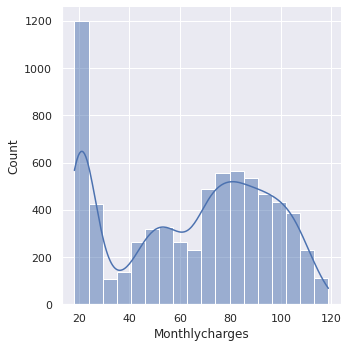

In [23]:
sns.displot(data['Monthlycharges'], kde=True)

If we consider the monthly charge around 20 to be an outlier, we quickly find that there is a distribution centered around a mean of perhaps 82. 

However, when we consider that a large number of people spend a monthly charge of about 20 dollars, we can draw an insight that these may be those customers who only require a bare minimum of services that offered by the company.

## Handling Categorical Variables

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   Seniorcitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   float64
 5   Phoneservice      7043 non-null   object 
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   object 
 16  Paymentmethod     7043 non-null   object 


In [25]:
print('Gender uniques: ', data['Gender'].unique())
print('Partner uniques: ', data['Partner'].unique())
print('Dependents uniques: ', data['Dependents'].unique())
print('Phoneservice uniques: ', data['Phoneservice'].unique())
print('Multiplelines uniques: ', data['Multiplelines'].unique())
print('Internetservice uniques: ', data['Internetservice'].unique())
print('Onlinesecurity uniques: ', data['Onlinesecurity'].unique())
print('Onlinebackup uniques: ', data['Onlinebackup'].unique())
print('Techsupport uniques: ', data['Techsupport'].unique())
print('Streamingtv uniques: ', data['Streamingtv'].unique())
print('Streamingmovies uniques: ', data['Streamingmovies'].unique())
print('Deviceprotection uniques: ', data['Deviceprotection'].unique())
print('Contract uniques: ', data['Contract'].unique())
print('Paperlessbilling uniques: ', data['Paperlessbilling'].unique())
print('Paymentmethod uniques: ', data['Paymentmethod'].unique())

Gender uniques:  ['Female' 'Male']
Partner uniques:  ['Yes' 'No']
Dependents uniques:  ['No' 'Yes']
Phoneservice uniques:  ['No' 'Yes']
Multiplelines uniques:  ['No phone service' 'No' 'Yes']
Internetservice uniques:  ['DSL' 'Fiber optic' 'No']
Onlinesecurity uniques:  ['No' 'Yes' 'No internet service']
Onlinebackup uniques:  ['Yes' 'No' 'No internet service']
Techsupport uniques:  ['No' 'Yes' 'No internet service']
Streamingtv uniques:  ['No' 'Yes' 'No internet service']
Streamingmovies uniques:  ['No' 'Yes' 'No internet service']
Deviceprotection uniques:  ['No' 'Yes' 'No internet service']
Contract uniques:  ['Month-to-month' 'One year' 'Two year']
Paperlessbilling uniques:  ['Yes' 'No']
Paymentmethod uniques:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


We encode the categorical variables using pandas' get_dummies:

In [26]:
dummies = pd.get_dummies(data[['Gender', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines', 'Internetservice', 
                               'Onlinesecurity', 'Onlinebackup', 'Techsupport', 'Streamingtv', 'Streamingmovies', 
                               'Deviceprotection','Contract', 'Paperlessbilling', 'Paymentmethod']], drop_first=True)
dummies.head()

,Gender_Male,Partner_Yes,Dependents_Yes,Phoneservice_Yes,Multiplelines_No phone service,Multiplelines_Yes,Internetservice_Fiber optic,Internetservice_No,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Contract_One year,Contract_Two year,Paperlessbilling_Yes,Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [27]:
dummy_data = pd.concat([dummies, data], axis = 1)
dummy_data.drop(['Gender', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 
                 'Techsupport', 'Streamingtv', 'Streamingmovies', 'Deviceprotection','Contract', 'Paperlessbilling', 'Paymentmethod'], axis = 1, 
                inplace = True)
dummy_data.head()

,Gender_Male,Partner_Yes,Dependents_Yes,Phoneservice_Yes,Multiplelines_No phone service,Multiplelines_Yes,Internetservice_Fiber optic,Internetservice_No,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Contract_One year,Contract_Two year,Paperlessbilling_Yes,Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Churn
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,1.0,29.85,2.090081e+03,No
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,34.0,56.95,1.080809e+07,No
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0,2.0,53.85,1.000800e+05,Yes
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0.0,45.0,42.30,1.080400e+07,No
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,2.0,70.70,1.050101e+05,Yes


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dummy_data['Churn'] = encoder.fit_transform(dummy_data['Churn'])
dummy_data.head()

,Gender_Male,Partner_Yes,Dependents_Yes,Phoneservice_Yes,Multiplelines_No phone service,Multiplelines_Yes,Internetservice_Fiber optic,Internetservice_No,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Contract_One year,Contract_Two year,Paperlessbilling_Yes,Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Churn
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,1.0,29.85,2.090081e+03,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,34.0,56.95,1.080809e+07,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0,2.0,53.85,1.000800e+05,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0.0,45.0,42.30,1.080400e+07,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,2.0,70.70,1.050101e+05,1


## Split into Features and Target

In [29]:
x = dummy_data.iloc[:, :-1]
y = dummy_data.iloc[:, -1]

## Feature Selection

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

x_features = SelectKBest(chi2, k='all').fit(x,y)
score_df = pd.DataFrame({'Features': x.columns, 'Score': x_features.scores_}).sort_values('Score', ascending=False)
score_df

,Features,Score
29,Totalcharges,6.352274e+09
27,Tenure,1.628167e+04
28,Monthlycharges,3.680788e+03
21,Contract_Two year,4.885781e+02
24,Paymentmethod_Electronic check,4.264228e+02
6,Internetservice_Fiber optic,3.744762e+02
10,Onlinebackup_No internet service,2.865202e+02
18,Deviceprotection_No internet service,2.865202e+02
16,Streamingmovies_No internet service,2.865202e+02
14,Streamingtv_No internet service,2.865202e+02


We select the features whose score is greater than 100.

In [31]:
X_features = SelectKBest(chi2, k=13)
X_transform = X_features.fit_transform(x, y)

In [32]:
filter = X_features.get_support()
filtered_x = x.columns[filter]
print(filtered_x)

Index(['Internetservice_Fiber optic', 'Internetservice_No',
       'Onlinesecurity_No internet service',
       'Onlinebackup_No internet service', 'Techsupport_No internet service',
       'Streamingtv_No internet service',
       'Streamingmovies_No internet service',
       'Deviceprotection_No internet service', 'Contract_Two year',
       'Paymentmethod_Electronic check', 'Tenure', 'Monthlycharges',
       'Totalcharges'],
      dtype='object')


In [33]:
filtered_x = np.array(x.columns[filter])
data_copy = dummy_data.copy()
for col in data_copy.columns:
  if col not in filtered_x:
    data_copy.drop(col, axis = 1, inplace = True)
data_copy.columns

Index(['Internetservice_Fiber optic', 'Internetservice_No',
       'Onlinesecurity_No internet service',
       'Onlinebackup_No internet service', 'Techsupport_No internet service',
       'Streamingtv_No internet service',
       'Streamingmovies_No internet service',
       'Deviceprotection_No internet service', 'Contract_Two year',
       'Paymentmethod_Electronic check', 'Tenure', 'Monthlycharges',
       'Totalcharges'],
      dtype='object')

In [34]:
data_copy.head()

,Internetservice_Fiber optic,Internetservice_No,Onlinesecurity_No internet service,Onlinebackup_No internet service,Techsupport_No internet service,Streamingtv_No internet service,Streamingmovies_No internet service,Deviceprotection_No internet service,Contract_Two year,Paymentmethod_Electronic check,Tenure,Monthlycharges,Totalcharges
0,0,0,0,0,0,0,0,0,0,1,1.0,29.85,2.090081e+03
1,0,0,0,0,0,0,0,0,0,0,34.0,56.95,1.080809e+07
2,0,0,0,0,0,0,0,0,0,0,2.0,53.85,1.000800e+05
3,0,0,0,0,0,0,0,0,0,0,45.0,42.30,1.080400e+07
4,1,0,0,0,0,0,0,0,0,1,2.0,70.70,1.050101e+05


In [35]:
data_copy.shape

(7043, 13)

## Split into Features and Targets

In [36]:
x = data_copy.iloc[:, :-1].values
y = dummy_data.iloc[:, -1].values

## Split into Test and Train Sets

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_train: ', y_train.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (5634, 12)
Shape x_test:  (1409, 12)
Shape y_train:  (5634,)
Shape y_test:  (1409,)


## Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## LazyPredict Library - Semi-Automated Machine Learning

LazyPredict is an open-source python library that helps you to semi-automate your Machine Learning Task. It can build multiple models without writing much code and helps understand which models work better for the processed dataset without requiring any parameter tuning.

Information source can be found [here](https://analyticsindiamag.com/visualizing-and-comparing-ml-models-using-lazypredict/#:~:text=LazyPredict%20is%20an%20open%2Dsource,without%20requiring%20any%20parameter%20tuning.).

We thus employ LazyPredict to quickly analyze which algorithms work better than the bunch. Since the target consists of an imbalanced class, we can also take advantage of the 'balanced accuracy' to understand which algorithms give us the best result when we later balance the dataset. The idea is to employ parameter tuning techniques to increase the accuracy and F1 Score.

In [39]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_test, predictions_test = clf.fit(x_train, x_test, y_train, y_test)

models_test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 29/29 [00:13<00:00,  2.10it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.70,0.73,0.73,0.71,0.02
NearestCentroid,0.63,0.72,0.72,0.65,0.05
LinearDiscriminantAnalysis,0.81,0.72,0.72,0.80,0.09
SGDClassifier,0.80,0.72,0.72,0.80,0.08
LabelSpreading,0.81,0.72,0.72,0.80,3.19
LabelPropagation,0.81,0.72,0.72,0.80,1.51
LGBMClassifier,0.80,0.71,0.71,0.80,0.14
LogisticRegression,0.81,0.71,0.71,0.80,0.09
CalibratedClassifierCV,0.81,0.71,0.71,0.80,1.30


Let us analyze the accuracy and balanced accuracy. Since the data is not sorted, we sort them for analysis:

In [40]:
accuracy_sorted = models_test.sort_values('Accuracy', ascending = False)
balanced_accuracy_sorted = models_test.sort_values('Balanced Accuracy', ascending = False)

We now analyse the performance of the imbalanced dataset:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

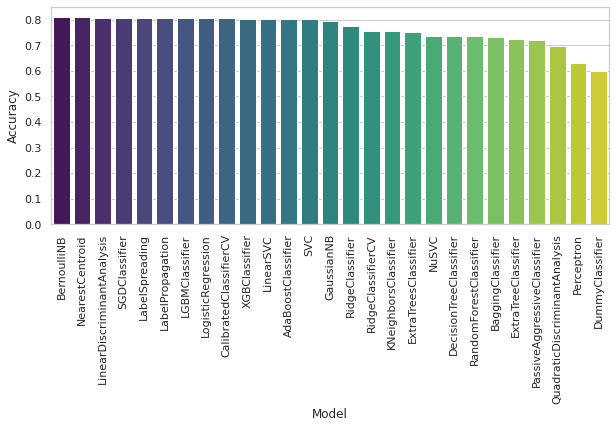

In [41]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sns.barplot(x = models_test.index, y = "Accuracy", data = accuracy_sorted, palette = 'viridis')
plt.xticks(rotation = 90)

We notice immediaely that the Naive Bayes' BernoulliNB algorithm has the highest accuracy at about 80% for the case where the imbalanced dataset is used. Of equal accuracy is the Stochastic Gradient Descent Classifier, which works by minimizing the cost function, XGBoost and SVC. kNN, Decision Tree and Random Forest Classifiers have lower accuracy in comparison to SVC.

Thus, we can expect to find a good accuracy for SVC in the imbalanced dataset.

Now, let us check the accuracy for the case of a balanced dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

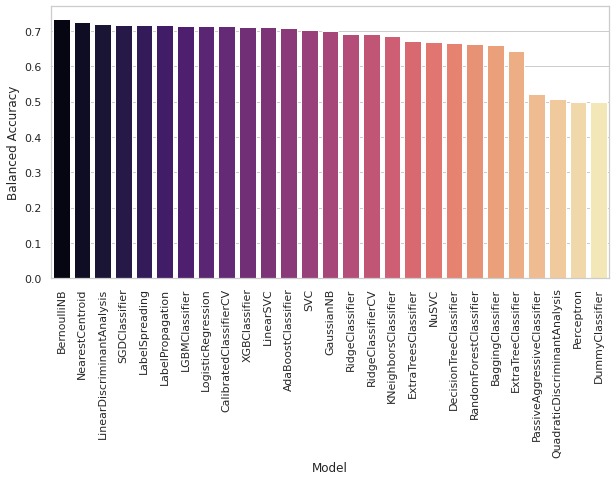

In [42]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = models_test.index, y = "Balanced Accuracy", data = balanced_accuracy_sorted, palette = 'magma')
plt.xticks(rotation = 90)

When the dataset is balanced, the accuracy falls by 10% to about 0.7. The highest accuracy was recorded for Naive Bayes' Bernoulli, followed by SGDClassifier, LogisticRegression, AdaBoost and SVC. 

Essentially, we can choose to tune the hyperparameters and thus hope to improve the accuracy.

## ML Techniques - Imbalanced Target class

We attempt to use various ML Algorithms for classification when the target class is imbalanced.

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

### k-Nearest Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier()
kNN_classifier.fit(x_train, y_train)
y_pred_kNN = kNN_classifier.predict(x_test)

In [45]:
y_pred_kNN_train = kNN_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the train set:  0.8358182463613774
Accuracy of the test set:  0.7743080198722498


In [46]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.59      0.50      0.54       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.69      1409
weighted avg       0.76      0.77      0.77      1409



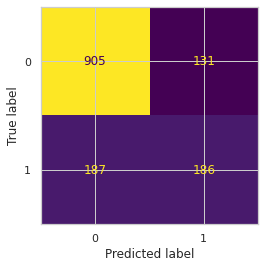

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar = False)

### Naive Bayes

In [48]:
from sklearn.naive_bayes import BernoulliNB
NB_classifier = BernoulliNB()
NB_classifier.fit(x_train, y_train)
y_pred_NB = NB_classifier.predict(x_test)

In [49]:
y_pred_NB_train = NB_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_NB_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_NB))

Accuracy of the train set:  0.6813986510472133
Accuracy of the test set:  0.6962384669978708


In [50]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      1036
           1       0.46      0.81      0.59       373

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.70      0.71      1409



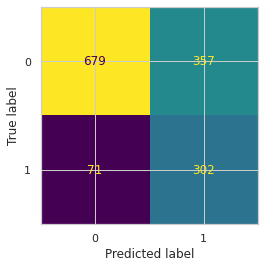

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB, colorbar = False)

### Support Vector Machine

In [52]:
from sklearn.svm import SVC
SVM_classifier = SVC()
SVM_classifier.fit(x_train, y_train)
y_pred_SVM = SVM_classifier.predict(x_test)

In [53]:
y_pred_SVM_train = SVM_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_SVM_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_SVM))

Accuracy of the train set:  0.7896698615548455
Accuracy of the test set:  0.8076650106458482


In [54]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



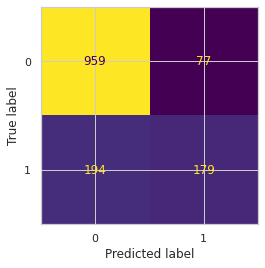

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM, colorbar = False)

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)
y_pred_LR = LR_classifier.predict(x_test)

In [57]:
y_pred_LR_train = LR_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_LR_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_LR))

Accuracy of the train set:  0.7903798367057153
Accuracy of the test set:  0.8097941802696949


In [58]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



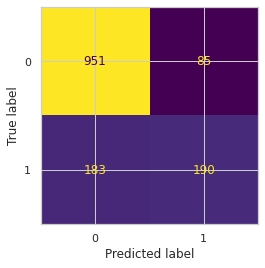

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR, colorbar = False)

### Decision Tree 

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train)
y_pred_DT = DT_classifier.predict(x_test)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [61]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the train set:  0.9886403975860845
Accuracy of the test set:  0.7331440738112136


There is overfitting, as evident between the huge difference between the accuracy of the training and testing datasets. 
We can use Pre-pruning technique to reduce overfitting.

#### Pre-pruning Technique for Decision Tree

We find the best values for the Hyperparameters 'max_depth', 'min_samples_leaf' and 'min_samples_split'. We will set the Cross validation to 3-fold and evaluate the Decision Tree.

In [62]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {
   "max_depth": [3, 5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 7] 
}

grid_cv = GridSearchCV(DT_classifier, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train)

In [63]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(x_train)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(x_test)))

Parameters for Grid Search:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for Grid Search:  0.8184137098299292
Train AUC-ROC Score for GS:  0.6795954024652173
Test AUC-ROC Score for GS:  0.6831596054116161


We use the parameters from Pre-pruning to model the Decision Tree again:

In [64]:
DT_classifier_pruned = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 2)
DT_classifier_pruned.fit(x_train, y_train)
y_pred_DT_pruned = DT_classifier_pruned.predict(x_test)

In [65]:
y_pred_DT_pruned_train = DT_classifier_pruned.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_pruned_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT_pruned))

Accuracy of the train set:  0.7964146254881079
Accuracy of the test set:  0.7977288857345636


The overfitting problem is solved. We now do a Performance Evaluation.

In [66]:
print(classification_report(y_test, y_pred_DT_pruned))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.68      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



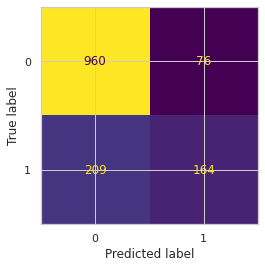

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT_pruned, colorbar = False)

### Random Forests

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state=42)
RF_classifier.fit(x_train, y_train)
y_pred_RF = RF_classifier.predict(x_test)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [69]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the train set:  0.9882854100106496
Accuracy of the test set:  0.7530163236337828


Again, this is a case of overfitting. We perform Pre-pruning.

#### Pre-pruning Technique for Random Forest

Overfitting can be solved to a great extent by the hyperparameters 'max_depth' (how deep will we have our decision trees) and 'n_estimators' (number of decision trees in each layer).

In [70]:
parameters_grid = {
   "max_depth": [3, 5],
    "n_estimators": [200, 300]
}

grid_cv = GridSearchCV(RF_classifier, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train)

In [71]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(x_train)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(x_test)))

Parameters for Grid Search:  {'max_depth': 5, 'n_estimators': 300}
CV score for Grid Search:  0.8328045280116149
Train AUC-ROC Score for GS:  0.6775257622711636
Test AUC-ROC Score for GS:  0.6894867866717733


We use the parameters from GridSearchCV to train the Random Forest:

In [72]:
RF_classifier_pruned = RandomForestClassifier(n_estimators=300, max_depth=5)
RF_classifier_pruned.fit(x_train, y_train)
y_pred_RF_pruned = RF_classifier_pruned.predict(x_test)

In [73]:
y_pred_RF_pruned_train = RF_classifier_pruned.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_pruned_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF_pruned))

Accuracy of the train set:  0.7960596379126731
Accuracy of the test set:  0.8019872249822569


The overfitting problem is now solved. We can evaluate the Performance of the model:

In [74]:
print(classification_report(y_test, y_pred_RF_pruned))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.69      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



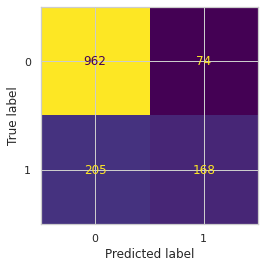

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF_pruned, colorbar = False)

### Stochastic Gradient Descent Classifier

In [76]:
from sklearn.linear_model import SGDClassifier
SGD_classifier = SGDClassifier()
SGD_classifier.fit(x_train, y_train)
y_pred_SGD = SGD_classifier.predict(x_test)
SGD_classifier.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [77]:
y_pred_SGD_train = SGD_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_SGD_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_SGD))

Accuracy of the train set:  0.7802626908058218
Accuracy of the test set:  0.7991483321504613


In [78]:
print(classification_report(y_test, y_pred_SGD))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1036
           1       0.63      0.57      0.60       373

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



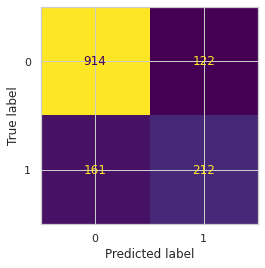

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SGD, colorbar = False)

We could implement other algorithms such as AdaBoost, XGBoost and so on, but the LazyPredict Library has already shown their performances without hyperparameter tuning.

## ROC Curve

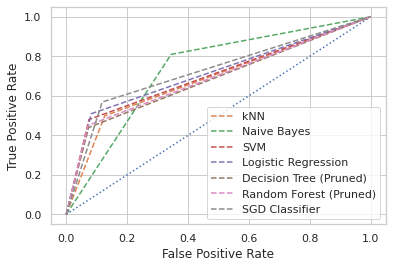

In [80]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr3, tpr3, '--', label='SVM')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_LR)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT_pruned)
plt.plot(fpr5, tpr5, '--', label='Decision Tree (Pruned)')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF_pruned)
plt.plot(fpr6, tpr6, '--', label='Random Forest (Pruned)')
fpr7, tpr7, thresholds = roc_curve(y_test, y_pred_SGD)
plt.plot(fpr7, tpr7, '--', label='SGD Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

It seems that the Classifiers does not really do well when it comes to dealing with False Positives, given that the target class is imbalanced. 

In terms of accuracy, SVM does a good job and upon tuning the hyperparameters in Decision Trees and Random Forests, we were able to get the accuracy up to 80%.

We have to tackle the Imbalance in the dataset in order to have a better ROC Curve. It is also noteworthy that when the target class is imbalanced, it is better to look at the F1 score rather than the accuracy.

## Tackling Imbalace in the Target class

We now analyze the performance of different algorithms after the target class is balanced.

### Oversampling using ADASYN

In [81]:
from imblearn.over_sampling import ADASYN
from collections import Counter
oversampler = ADASYN()
X, Y = oversampler.fit_resample(x,y)
Counter(Y)

Counter({0: 5174, 1: 5085})

### Train and Test Sets

In [82]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X, Y, random_state=42, test_size=0.2)
print('Shape x_train: ', x_train_balanced.shape)
print('Shape y_train: ', y_train_balanced.shape)
print('Shape x_test: ', x_test_balanced.shape)
print('Shape y_test: ', y_test_balanced.shape)

Shape x_train:  (8207, 12)
Shape y_train:  (8207,)
Shape x_test:  (2052, 12)
Shape y_test:  (2052,)


### Standardization

In [83]:
scaler = StandardScaler()
scaler.fit(x_train_balanced)
x_train_balanced = scaler.transform(x_train_balanced)
x_test_balanced = scaler.transform(x_test_balanced)

### ML Techniques

#### k-Nearest Neighbours

In [84]:
kNN_classifier_balanced = KNeighborsClassifier()
kNN_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_kNN_balanced = kNN_classifier_balanced.predict(x_test_balanced)

In [85]:
y_pred_kNN_train_balanced = kNN_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_kNN_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_kNN_balanced))

Accuracy of the train set:  0.8559766053369076
Accuracy of the test set:  0.7841130604288499


In [86]:
print(classification_report(y_test_balanced, y_pred_kNN_balanced))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1064
           1       0.75      0.82      0.79       988

    accuracy                           0.78      2052
   macro avg       0.79      0.79      0.78      2052
weighted avg       0.79      0.78      0.78      2052



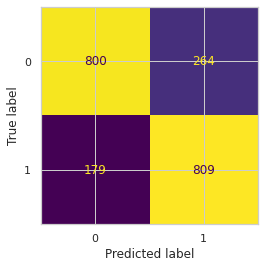

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_kNN_balanced, colorbar = False)

#### Naive Bayes

In [88]:
NB_classifier_balanced = BernoulliNB()
NB_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_NB_balanced = NB_classifier_balanced.predict(x_test_balanced)

In [89]:
y_pred_NB_train_balanced = NB_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_NB_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_NB_balanced))

Accuracy of the train set:  0.6907517972462532
Accuracy of the test set:  0.6739766081871345


In [90]:
print(classification_report(y_test_balanced, y_pred_NB_balanced))

              precision    recall  f1-score   support

           0       0.80      0.50      0.61      1064
           1       0.61      0.86      0.72       988

    accuracy                           0.67      2052
   macro avg       0.71      0.68      0.67      2052
weighted avg       0.71      0.67      0.66      2052



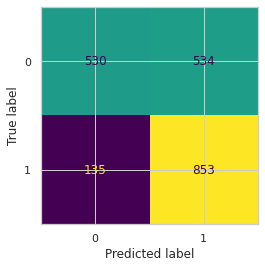

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_NB_balanced, colorbar = False)

#### Support Vector Machine

In [92]:
SVM_classifier_balanced = SVC()
SVM_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_SVM_balanced = SVM_classifier_balanced.predict(x_test_balanced)

In [93]:
y_pred_SVM_train_balanced = SVM_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_SVM_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_SVM_balanced))

Accuracy of the train set:  0.7567929816010722
Accuracy of the test set:  0.7470760233918129


In [94]:
print(classification_report(y_test_balanced, y_pred_SVM_balanced))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1064
           1       0.72      0.77      0.74       988

    accuracy                           0.75      2052
   macro avg       0.75      0.75      0.75      2052
weighted avg       0.75      0.75      0.75      2052



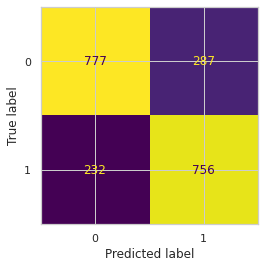

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_SVM_balanced, colorbar = False)

#### Logistic Regression

In [96]:
LR_classifier_balanced = LogisticRegression()
LR_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_LR_balanced = LR_classifier_balanced.predict(x_test_balanced)

In [97]:
y_pred_LR_train_balanced = LR_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_LR_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_LR_balanced))

Accuracy of the train set:  0.7246253198489094
Accuracy of the test set:  0.7192982456140351


In [98]:
print(classification_report(y_test_balanced, y_pred_LR_balanced))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1064
           1       0.69      0.77      0.73       988

    accuracy                           0.72      2052
   macro avg       0.72      0.72      0.72      2052
weighted avg       0.72      0.72      0.72      2052



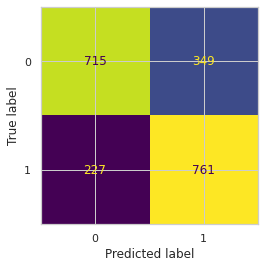

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_LR_balanced, colorbar = False)

#### Decision Tree

In [100]:
DT_classifier_balanced = DecisionTreeClassifier()
DT_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_DT_balanced = DT_classifier_balanced.predict(x_test_balanced)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [101]:
y_pred_DT_train_balanced = DT_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_DT_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_DT_balanced))

Accuracy of the train set:  0.9903740709150725
Accuracy of the test set:  0.7680311890838206


This is probably overfitting: we perform pre-pruning by oversampling.

##### Pre-pruning Technique for Decision Tree

In [102]:
parameters_grid = {
   "max_depth": [3, 5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 7, 9, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 7] 
}

grid_cv = GridSearchCV(DT_classifier_balanced, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train_balanced,
                                                                                                        y_train_balanced)

In [103]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train_balanced, grid_cv.predict(x_train_balanced)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test_balanced, grid_cv.predict(x_test_balanced)))

Parameters for Grid Search:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}
CV score for Grid Search:  0.8660152611907964
Train AUC-ROC Score for GS:  0.8276052681120303
Test AUC-ROC Score for GS:  0.7844491035280509


We use the values that have been suggested as optimal by the GridSearchCV:

In [104]:
DT_classifier_balanced_pruned = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 15)
DT_classifier_balanced_pruned.fit(x_train_balanced, y_train_balanced)
y_pred_DT_balanced_pruned = DT_classifier_balanced_pruned.predict(x_test_balanced)

In [105]:
y_pred_DT_balanced_pruned_train = DT_classifier_balanced_pruned.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_DT_balanced_pruned_train))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_DT_balanced_pruned))

Accuracy of the train set:  0.8278299013037651
Accuracy of the test set:  0.7841130604288499


The problem of oversampling has been solved. We can now check the performance of the model:

In [106]:
print(classification_report(y_test_balanced, y_pred_DT_balanced_pruned))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1064
           1       0.77      0.79      0.78       988

    accuracy                           0.78      2052
   macro avg       0.78      0.78      0.78      2052
weighted avg       0.78      0.78      0.78      2052



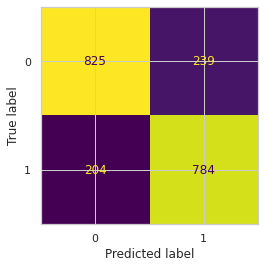

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_DT_balanced_pruned, colorbar = False)

#### Random Forests

In [108]:
RF_classifier_balanced = RandomForestClassifier(random_state=42)
RF_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_RF_balanced = RF_classifier_balanced.predict(x_test_balanced)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [109]:
y_pred_RF_train_balanced = RF_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_RF_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_RF_balanced))

Accuracy of the train set:  0.9902522237114658
Accuracy of the test set:  0.7958089668615984


Overfitting exists here; we perform Pre-pruning.

##### Pre-pruning Technique for Random Forest

In [110]:
parameters_grid = {
    "max_depth": [10, 15, 20, 25],
    "n_estimators": [500, 600],
    'min_samples_split': [2, 3, 5, 7]
}

grid_cv = GridSearchCV(RF_classifier_balanced, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train_balanced,
                                                                                                        y_train_balanced)

In [111]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train_balanced, grid_cv.predict(x_train_balanced)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test_balanced, grid_cv.predict(x_test_balanced)))

Parameters for Grid Search:  {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}
CV score for Grid Search:  0.8908073821151058
Train AUC-ROC Score for GS:  0.9173047218099767
Test AUC-ROC Score for GS:  0.8067524580682477


Using the values that were derived from GridSearchCV:

In [112]:
RF_classifier_pruned_balanced = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=3)
RF_classifier_pruned_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_RF_pruned_balanced = RF_classifier_pruned_balanced.predict(x_test_balanced)

In [113]:
y_pred_RF_pruned_train_balanced = RF_classifier_pruned_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_RF_pruned_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_RF_pruned_balanced))

Accuracy of the train set:  0.9187279151943463
Accuracy of the test set:  0.807504873294347


There may still exist some level of overfitting. We could however further tune the hyperparameters and generate a better model but we can choose this to be our final version, since the cross-validation score is 0.89 which is good enough. Hence, we evaluate its performance:


In [114]:
print(classification_report(y_test_balanced, y_pred_RF_pruned_balanced))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1064
           1       0.78      0.83      0.81       988

    accuracy                           0.81      2052
   macro avg       0.81      0.81      0.81      2052
weighted avg       0.81      0.81      0.81      2052



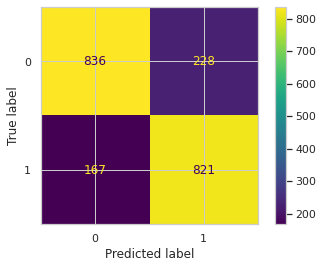

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_RF_pruned_balanced)

#### Stochastic Gradient Descent Classifier

In [116]:
SGD_classifier_balanced = SGDClassifier(early_stopping=True)
SGD_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_SGD_balanced = SGD_classifier_balanced.predict(x_test_balanced)
SGD_classifier_balanced.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': True,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [117]:
y_pred_SGD_train_balanced = SGD_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_SGD_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_SGD_balanced))

Accuracy of the train set:  0.7135372243207019
Accuracy of the test set:  0.7085769980506823


In [118]:
print(classification_report(y_test_balanced, y_pred_SGD_balanced))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1064
           1       0.70      0.70      0.70       988

    accuracy                           0.71      2052
   macro avg       0.71      0.71      0.71      2052
weighted avg       0.71      0.71      0.71      2052



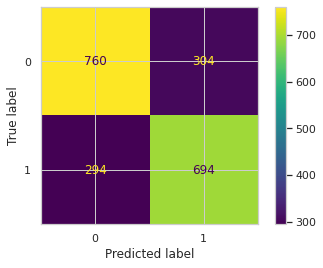

In [119]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_SGD_balanced)

## ROC Curve

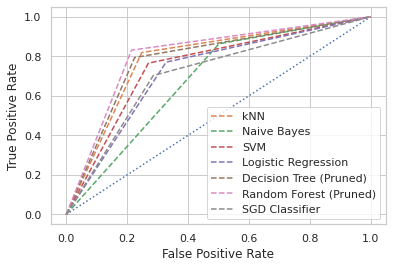

In [120]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test_balanced, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test_balanced, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test_balanced, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM')
fpr4, tpr4, thresholds = roc_curve(y_test_balanced, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test_balanced, y_pred_DT_balanced_pruned)
plt.plot(fpr5, tpr5, '--', label='Decision Tree (Pruned)')
fpr6, tpr6, thresholds = roc_curve(y_test_balanced, y_pred_RF_pruned_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest (Pruned)')
fpr7, tpr7, thresholds = roc_curve(y_test_balanced, y_pred_SGD_balanced)
plt.plot(fpr7, tpr7, '--', label='SGD Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The False Positives are better caught by the Random Forest Classifier after hyperparameter tuning. Following the Random Forest Classifier, the ROC Curve is better for the Decision Trees and kNeighbors Classifier.

## Performance Evaluation

In [121]:
performance_df = pd.DataFrame(columns = ['Model'])
performance_df['Model'] = ['kNeighborsClassifier', 'BernoulliNB', 'SVC', 'LogisticRegression', 'DecisionTreeClassifier', 
                              'RandomForestClassifier', 'SGDClassifier']
performance_df['Accuracy - Imbalanced'] = [0.77, 0.70, 0.81, 0.81, 0.80, 0.80, 0.80]
performance_df['F1 Score - Imbalanced'] = [0.77, 0.71, 0.79, 0.80, 0.78, 0.79, 0.81]
performance_df['Accuracy - Balanced'] = [0.78, 0.67, 0.75, 0.72, 0.78, 0.81, 0.71]
performance_df['F1 Score - Balanced'] = [0.78, 0.66, 0.75, 0.71, 0.78, 0.81, 0.71] 
performance_df

,Model,Accuracy - Imbalanced,F1 Score - Imbalanced,Accuracy - Balanced,F1 Score - Balanced
0,kNeighborsClassifier,0.77,0.77,0.78,0.78
1,BernoulliNB,0.70,0.71,0.67,0.66
2,SVC,0.81,0.79,0.75,0.75
3,LogisticRegression,0.81,0.80,0.72,0.71
4,DecisionTreeClassifier,0.80,0.78,0.78,0.78
5,RandomForestClassifier,0.80,0.79,0.81,0.81
6,SGDClassifier,0.80,0.81,0.71,0.71


In [122]:
imbalanced_accuracy_sorted = performance_df.sort_values('Accuracy - Imbalanced', ascending = False)
balanced_accuracy_sorted = performance_df.sort_values('Accuracy - Balanced', ascending = False)
imbalanced_F1_score_sorted = performance_df.sort_values('F1 Score - Imbalanced', ascending = False)
balanced_F1_score_sorted = performance_df.sort_values('F1 Score - Balanced', ascending = False)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

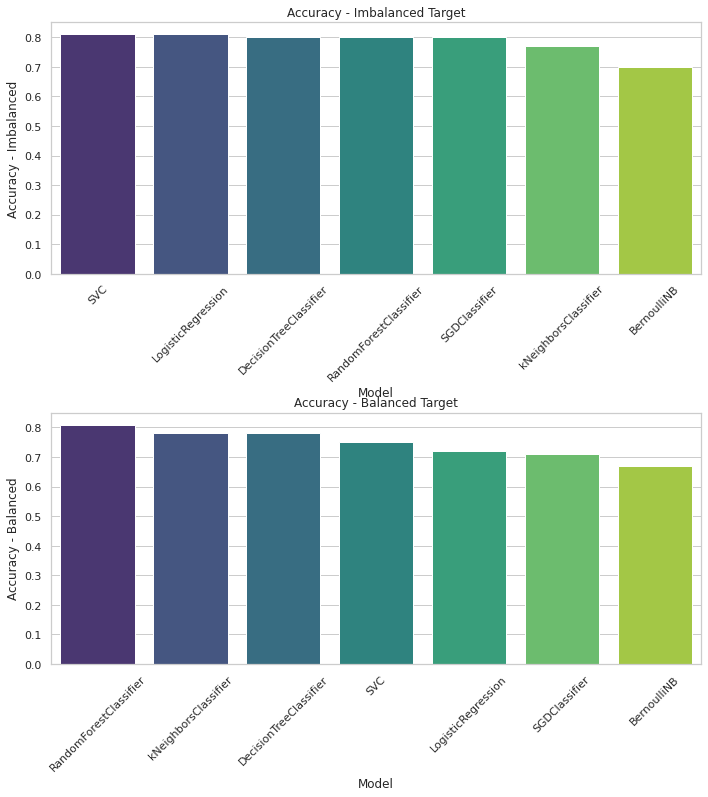

In [123]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
sns.set_style("whitegrid")
sns.barplot(x = "Model", y = "Accuracy - Imbalanced", data = imbalanced_accuracy_sorted, palette = 'viridis')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('Accuracy - Imbalanced Target')
plt.subplot(212)
sns.barplot(x = "Model", y = "Accuracy - Balanced", data = balanced_accuracy_sorted, palette = 'viridis')
plt.tight_layout()
plt.title('Accuracy - Balanced Target')
plt.xticks(rotation = 45)

We note that when the target is imbalanced, the accuracy is the highest at about 80% for SVC, Logistic Regression, Random Forest and Decision Tree Classifiers.

However, when the target is balanced, the accuracy is the highest at about 80% for Random Forest Classifier. Following Random Forest Classifier, kNeighbors Classifier and Decision Tree Classifier have the highest accuracy.

When analyzing imbalanced target class, F1 score is a better metric. We look at the weighted average since the target is imbalanced and we would like to have more importance to the predictions of class 'Yes'.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

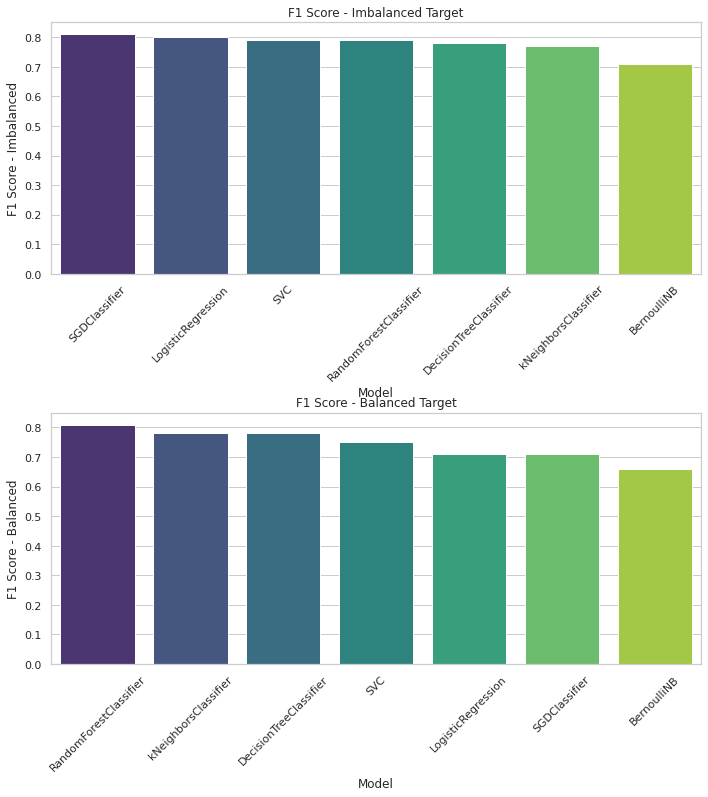

In [124]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
sns.set_style("whitegrid")
sns.barplot(x = 'Model', y = "F1 Score - Imbalanced", data = imbalanced_F1_score_sorted, palette = 'viridis')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title('F1 Score - Imbalanced Target')
plt.subplot(212)
sns.barplot(x = 'Model', y = "F1 Score - Balanced", data = balanced_F1_score_sorted, palette = 'viridis')
plt.tight_layout()
plt.title('F1 Score - Balanced Target')
plt.xticks(rotation = 45)

We note that when the target is imbalanced, the weighted F1 Score is the highest at about 80% for SGD Classifier, followed by Logistic Regression, SVC, Random Forests and Decision Trees Classifier.

However, when the target is balanced, the F1 Score is the highest at about 80% for Random Forest Classifier. Following the Random Forest Classifier are the  kNeighbors Classifier and Decision Tree Classifier at about 78%.

## Conclusion

Although the ROC Curve shows improvement when the target class is balanced, it is still not far from the accuracy of about 80% on average. 